In [81]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')
import pandas as pd  # Data manipulation
import numpy as np  #Numerical computation
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical Data visualtization
import re # Regular expression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # sentiment analysis
import yfinance as yf # Yahoo finance for BTC price extract
import ta # For adding technical Indicators SMA, RSI etc.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
tweets = pd.read_csv('tweets.csv') #import data
tweets.head()

,created_at,rounded_time,text
0,01/31/2023-00:26:52,01/31/2023-00:00,chroniclove69 onlyfans leaks (13 photos)\n\nTi...
1,01/31/2023-00:30:53,01/31/2023-01:00,RT @RollbitRewards: $250 #Giveaway ðð\n\...
2,01/31/2023-00:31:53,01/31/2023-01:00,RT @Ashcryptoreal: Bitcoin needs to close abov...
3,01/31/2023-00:32:23,01/31/2023-01:00,RT @MacnBTC: You won't make lifechanging money...
4,01/31/2023-00:35:54,01/31/2023-01:00,ðNew Verified Airdropâ \n(65% Legit Airdro...


In [3]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def contx_to_exp(text):
  for key in apostrophe_dict:
    value = apostrophe_dict[key]
    text = text.replace(key, value)
    return text

In [5]:
# Emotion detection by different symbols
emotion_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

def emotion_check(text):
  for key in emotion_dict:
    value = emotion_dict[key]
    text = text.replace(key, value)
    return text

In [6]:
def clean_text(text):
  text = re.sub(r'https?:\/\/\S*'," ", text) # Removing the url from the text
  text = re.sub(r'@\S+', " ", text) # Removing twitter handles from the text
  text = re.sub('#'," ", text) # removing # from the data
  text = re.sub(r'RT', "", text) # Removing the Re-tweet mark
  text = re.sub(r"\s+"," ", text)  # Removing Extra Spaces
  text = text.lower()
  return text

import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt.lower()

In [7]:
#removing the twitter handles @user, special char, numbers, and punctuations
tweets['clean_tweet'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")

#using above functions
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : clean_text(x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : contx_to_exp(x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : emotion_check(x))
tweets['clean_tweet'] = tweets['clean_tweet'].str.replace("[^a-zA-Z]", " ")
#remove short words
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
# Removing every thing other than text
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r'[^\w\s]',' ',x))  # Replacing Punctuations with space
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r'[^a-zA-Z]', ' ', x)) # Raplacing all the things with space other than text
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r"\s+"," ", x)) # Removing extra spaces


#individual words as tokens
tokenized_tweet = tweets['clean_tweet'].apply(lambda x: x.split())


#stem the words

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence])



#combine words into single sentence 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    

    
tweets['clean_tweet'] = tokenized_tweet
tweets.head()

,created_at,rounded_time,text,clean_tweet
0,01/31/2023-00:26:52,01/31/2023-00:00,chroniclove69 onlyfans leaks (13 photos)\n\nTi...,chroniclov onlyfan leak photo tip lw l reueyxr...
1,01/31/2023-00:30:53,01/31/2023-01:00,RT @RollbitRewards: $250 #Giveaway ðð\n\...,giveaway friend follow winner day rollbit rewa...
2,01/31/2023-00:31:53,01/31/2023-01:00,RT @Ashcryptoreal: Bitcoin needs to close abov...,bitcoin need close abov then program
3,01/31/2023-00:32:23,01/31/2023-01:00,RT @MacnBTC: You won't make lifechanging money...,won t make lifechang money btc eth anymor leas...
4,01/31/2023-00:35:54,01/31/2023-01:00,ðNew Verified Airdropâ \n(65% Legit Airdro...,new verifi airdrop legit airdrop orbeon protoc...


In [8]:
from textblob import TextBlob     #  NLP Function
polarity=[]     #list that contains polarity of tweets
subjectivity=[]    ##list that contains subjectivity of tweets

for i in tweets.text.values:
    try:
        analysis = TextBlob(i) # [i] records to the first data in dataset
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)
        

        
# adding sentiment score in csv

tweets['sentiment_score'] = polarity
tweets.head()

,created_at,rounded_time,text,clean_tweet,sentiment_score
0,01/31/2023-00:26:52,01/31/2023-00:00,chroniclove69 onlyfans leaks (13 photos)\n\nTi...,chroniclov onlyfan leak photo tip lw l reueyxr...,0.00
1,01/31/2023-00:30:53,01/31/2023-01:00,RT @RollbitRewards: $250 #Giveaway ðð\n\...,giveaway friend follow winner day rollbit rewa...,0.00
2,01/31/2023-00:31:53,01/31/2023-01:00,RT @Ashcryptoreal: Bitcoin needs to close abov...,bitcoin need close abov then program,0.00
3,01/31/2023-00:32:23,01/31/2023-01:00,RT @MacnBTC: You won't make lifechanging money...,won t make lifechang money btc eth anymor leas...,-0.35
4,01/31/2023-00:35:54,01/31/2023-01:00,ðNew Verified Airdropâ \n(65% Legit Airdro...,new verifi airdrop legit airdrop orbeon protoc...,0.10


In [9]:
tweets.to_csv('Cleaned tweets with sentiments.csv', index=False) #export csv 

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
#df = pd.read_csv('Cleaned tweets with sentiments.csv.csv')

# Define the sentiment analysis function
def get_vader_sentiment(text):
    if isinstance(text, str):  # Check if the input is a string
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    else:
        return 0.0  # Return neutral sentiment score for non-string inputs

# Apply sentiment analysis to the 'clean_tweet' column
# Convert non-string values to NaN, then fill with an empty string or drop
tweets['clean_tweet'] = tweets['clean_tweet'].fillna('').astype(str)

# Apply the sentiment analysis function
tweets['sentiment_score'] = tweets['clean_tweet'].apply(get_vader_sentiment)

# Classify the sentiment as positive, neutral, or negative
def classify_vader_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
        

tweets['sentiment'] = tweets['sentiment_score'].apply(classify_vader_sentiment)

# Classify the sentiment as positive, neutral, or negative
tweets['sentiment'] = tweets['sentiment_score'].apply(classify_vader_sentiment)

# Save the DataFrame with the sentiment scores and classifications
tweets.to_csv('tweets_with_vader_sentiment.csv', index=False) #export csv

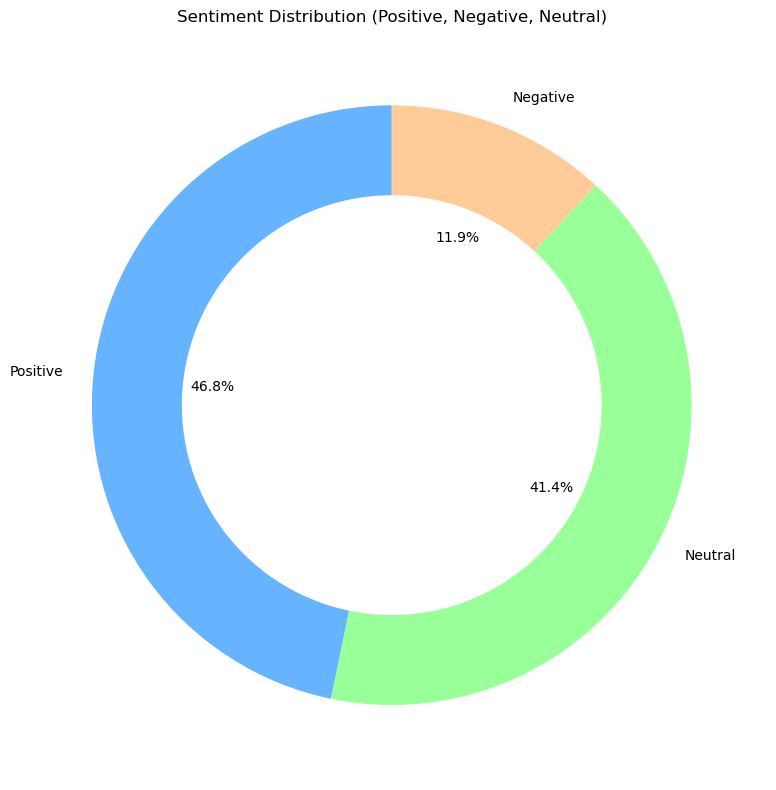

In [11]:
import matplotlib.pyplot as plt

# Load the dataset
#textblob_df = pd.read_csv('tweets_with_vader_sentiment.csv')

# Count the sentiment categories
sentiment_counts = tweets['sentiment'].value_counts()

# Create a doughnut plot
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
center_circle = plt.Circle((0,0), 0.70, fc='white')  # Create a doughnut effect
plt.gca().add_artist(center_circle)

# Add a title
plt.title('Sentiment Distribution (Positive, Negative, Neutral)')
plt.tight_layout()
plt.show()

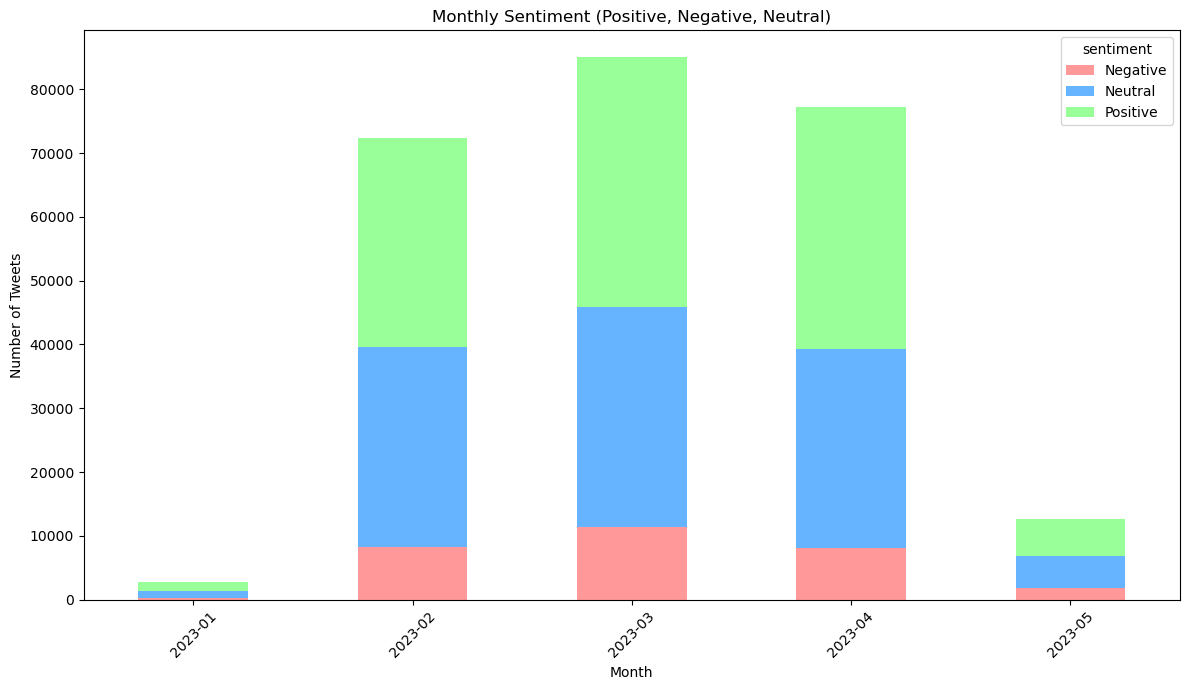

In [402]:

# Load the dataset
textblob_df = tweets
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y-%H:%M')
    except ValueError:
        # Handle other possible formats if needed
        raise ValueError(f"Unrecognized date format: {date_str}")


textblob_df['rounded_time'] = textblob_df['rounded_time'].apply(parse_date)

# Convert the date column to datetime
textblob_df['rounded_time'] = pd.to_datetime(textblob_df['rounded_time'], format='%d/%m/%Y')

# Group by month and sentiment category
monthly_sentiment = textblob_df.groupby([textblob_df['rounded_time'].dt.to_period('M'), 'sentiment']).size().unstack()

# Plot the bar chart
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Monthly Sentiment (Positive, Negative, Neutral)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
import yfinance as yf
btc_data = yf.download("BTC-USD", start="2023-01-31", end="2023-05-05", interval='1h')
btc_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,,
2023-01-31 00:00:00+00:00,22857.765625,22857.765625,22864.251953,22765.568359,22840.796875,0
2023-01-31 01:00:00+00:00,22858.328125,22858.328125,22870.337891,22797.083984,22855.978516,0
2023-01-31 02:00:00+00:00,22893.318359,22893.318359,22909.501953,22847.179688,22855.148438,0
2023-01-31 03:00:00+00:00,22861.804688,22861.804688,22890.263672,22858.869141,22890.263672,0
2023-01-31 04:00:00+00:00,22862.117188,22862.117188,22874.230469,22831.378906,22859.744141,0
...,...,...,...,...,...,...
2023-05-04 19:00:00+00:00,28891.419922,28891.419922,28903.476562,28745.201172,28817.916016,0
2023-05-04 20:00:00+00:00,28878.654297,28878.654297,28897.177734,28833.529297,28892.835938,0


In [13]:
btc_data.to_csv('price.csv', index=False)

In [14]:
btc_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,,
2023-01-31 00:00:00+00:00,22857.765625,22857.765625,22864.251953,22765.568359,22840.796875,0
2023-01-31 01:00:00+00:00,22858.328125,22858.328125,22870.337891,22797.083984,22855.978516,0
2023-01-31 02:00:00+00:00,22893.318359,22893.318359,22909.501953,22847.179688,22855.148438,0
2023-01-31 03:00:00+00:00,22861.804688,22861.804688,22890.263672,22858.869141,22890.263672,0
2023-01-31 04:00:00+00:00,22862.117188,22862.117188,22874.230469,22831.378906,22859.744141,0
...,...,...,...,...,...,...
2023-05-04 19:00:00+00:00,28891.419922,28891.419922,28903.476562,28745.201172,28817.916016,0
2023-05-04 20:00:00+00:00,28878.654297,28878.654297,28897.177734,28833.529297,28892.835938,0


In [15]:
btc_data.index

DatetimeIndex(['2023-01-31 00:00:00+00:00', '2023-01-31 01:00:00+00:00',
               '2023-01-31 02:00:00+00:00', '2023-01-31 03:00:00+00:00',
               '2023-01-31 04:00:00+00:00', '2023-01-31 05:00:00+00:00',
               '2023-01-31 06:00:00+00:00', '2023-01-31 07:00:00+00:00',
               '2023-01-31 08:00:00+00:00', '2023-01-31 09:00:00+00:00',
               ...
               '2023-05-04 14:00:00+00:00', '2023-05-04 15:00:00+00:00',
               '2023-05-04 16:00:00+00:00', '2023-05-04 17:00:00+00:00',
               '2023-05-04 18:00:00+00:00', '2023-05-04 19:00:00+00:00',
               '2023-05-04 20:00:00+00:00', '2023-05-04 21:00:00+00:00',
               '2023-05-04 22:00:00+00:00', '2023-05-04 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=2202, freq=None)

In [16]:
df = pd.read_csv('btc_hourly_data1.csv')
print(df.head())

           Datetime    Adj Close        Close         High          Low  \
0  01/31/2023-00:00  22857.76563  22857.76563  22864.25195  22765.56836   
1  01/31/2023-01:00  22858.32813  22858.32813  22870.33789  22797.08398   
2  01/31/2023-02:00  22893.31836  22893.31836  22909.50195  22847.17969   
3  01/31/2023-03:00  22861.80469  22861.80469  22890.26367  22858.86914   
4  01/31/2023-04:00  22862.11719  22862.11719  22874.23047  22831.37891   

          Open  Volume  
0  22840.79688       0  
1  22855.97852       0  
2  22855.14844       0  
3  22890.26367       0  
4  22859.74414       0  


In [17]:
df.rename(columns={'Datetime': 'rounded_time'}, inplace=True)
df

,rounded_time,Adj Close,Close,High,Low,Open,Volume
0,01/31/2023-00:00,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0
1,01/31/2023-01:00,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0
2,01/31/2023-02:00,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0
3,01/31/2023-03:00,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0
4,01/31/2023-04:00,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0
...,...,...,...,...,...,...,...
2221,05/05/2023-19:00,29548.35742,29548.35742,29563.33594,29405.56445,29423.19727,43716608
2222,05/05/2023-20:00,29545.22656,29545.22656,29592.90039,29490.28906,29573.83203,95922176
2223,05/05/2023-21:00,29529.33008,29529.33008,29573.42578,29491.31445,29543.92773,8183808
2224,05/05/2023-22:00,29636.26367,29636.26367,29665.10547,29516.07617,29520.10742,14575616


In [18]:
# Load the TextBlob and VADER sentiment datasets
textblob_df = pd.read_csv('Cleaned tweets with sentiments.csv')
vader_df = pd.read_csv('tweets_with_vader_sentiment.csv')
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y-%H:%M')
    except ValueError:
        return pd.to_datetime(date_str, format='%m/%d/%Y-%H:%M')

textblob_df['rounded_time'] = textblob_df['rounded_time'].apply(parse_date)
vader_df['rounded_time'] = vader_df['rounded_time'].apply(parse_date)

# Ensure the column is in datetime format for proper plotting, with a specified format
textblob_df['rounded_time'] = pd.to_datetime(textblob_df['rounded_time'], format='%m/%d/%Y-%H:%M')
vader_df['rounded_time'] = pd.to_datetime(vader_df['rounded_time'], format='%m/%d/%Y-%H:%M')

# Aggregate sentiment scores by date (average sentiment per day)
textblob_daily = textblob_df.groupby('rounded_time')['sentiment_score'].mean().reset_index()
vader_daily = vader_df.groupby('rounded_time')['sentiment_score'].mean().reset_index()

# Ensure the 'Date' column in the Bitcoin dataset is in datetime format
df['rounded_time'] = pd.to_datetime(df['rounded_time'], format='%m/%d/%Y-%H:%M')

# Merge TextBlob, VADER, and Bitcoin data according to date
merged_data = pd.merge(textblob_daily, vader_daily, on='rounded_time', how='inner', suffixes=('_textblob', '_vader'))
merged_data = pd.merge(merged_data, df, left_on='rounded_time', right_on='rounded_time', how='inner')


# Show the first few rows of merged data
print(merged_data.head())

         rounded_time  sentiment_score_textblob  sentiment_score_vader  \
0 2023-01-31 00:00:00                  0.142336               0.165558   
1 2023-01-31 01:00:00                  0.129171               0.178608   
2 2023-01-31 02:00:00                  0.164494               0.186917   
3 2023-01-31 03:00:00                  0.094387               0.158187   
4 2023-01-31 04:00:00                  0.106855               0.235430   

     Adj Close        Close         High          Low         Open  Volume  
0  22857.76563  22857.76563  22864.25195  22765.56836  22840.79688       0  
1  22858.32813  22858.32813  22870.33789  22797.08398  22855.97852       0  
2  22893.31836  22893.31836  22909.50195  22847.17969  22855.14844       0  
3  22861.80469  22861.80469  22890.26367  22858.86914  22890.26367       0  
4  22862.11719  22862.11719  22874.23047  22831.37891  22859.74414       0  


In [19]:
#New feature added 
price_indicator = [merged_data.Close[0] - merged_data['Open'][0]]
for i in range(len(merged_data)-1):
    price_indicator.append(merged_data.Close[i+1] - merged_data.Close[i])
price_indicator

[16.96875,
 0.5625,
 34.99022999999943,
 -31.513670000000275,
 0.3125,
 -50.62696000000142,
 24.529300000001967,
 128.63280999999915,
 -59.859370000001945,
 11.574220000002242,
 -55.51563000000169,
 35.41797000000224,
 27.544920000000275,
 170.03125,
 56.449219999998604,
 -16.63086000000112,
 -9.146479999999428,
 31.34375,
 28.667969999998604,
 -11.72070999999778,
 -56.546870000001945,
 -176.92187999999805,
 249.31836000000112,
 -49.294920000000275,
 -43.93555000000197,
 38.458989999999176,
 -19.224609999997483,
 9.978520000000572,
 16.601559999999154,
 -12.966800000001967,
 -56.96875,
 20.029300000001967,
 -101.39648999999918,
 23.884769999996934,
 3.1699200000002747,
 58.482420000000275,
 -1.9413999999997031,
 31.11522999999943,
 11.859380000001693,
 -111.32227000000057,
 -18.43359000000055,
 14.660149999999703,
 96.26563000000169,
 298.2402299999994,
 147.46875,
 150.53515999999945,
 19.673829999999725,
 8.160149999999703,
 436.875,
 -176.56835999999748,
 -71.52734000000055,
 -25.68

In [20]:
merged_data['price_indicator'] = 0
for i in range(len(price_indicator)):
    merged_data['price_indicator'][i] = price_indicator[i]
    
merged_data.head()

,rounded_time,sentiment_score_textblob,sentiment_score_vader,Adj Close,Close,High,Low,Open,Volume,price_indicator
0,2023-01-31 00:00:00,0.142336,0.165558,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0,16.96875
1,2023-01-31 01:00:00,0.129171,0.178608,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0,0.56250
2,2023-01-31 02:00:00,0.164494,0.186917,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0,34.99023
3,2023-01-31 03:00:00,0.094387,0.158187,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0,-31.51367
4,2023-01-31 04:00:00,0.106855,0.235430,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0,0.31250


In [21]:
merged_data.to_csv('price indicator with sentiments1.csv', index=False)

In [22]:
#Add another discrete variable as per price predictor
merged_data['target'] = 0
for i in range(len(merged_data)-1):
    if merged_data.price_indicator[i] > 0:
        merged_data['target'][i] = 1 
        
# 0 - price down
# 1 - price up

merged_data.head()

,rounded_time,sentiment_score_textblob,sentiment_score_vader,Adj Close,Close,High,Low,Open,Volume,price_indicator,target
0,2023-01-31 00:00:00,0.142336,0.165558,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0,16.96875,1
1,2023-01-31 01:00:00,0.129171,0.178608,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0,0.56250,1
2,2023-01-31 02:00:00,0.164494,0.186917,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0,34.99023,1
3,2023-01-31 03:00:00,0.094387,0.158187,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0,-31.51367,0
4,2023-01-31 04:00:00,0.106855,0.235430,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0,0.31250,1


In [23]:
merged_data.to_csv('Target price indicator.csv', index=False)

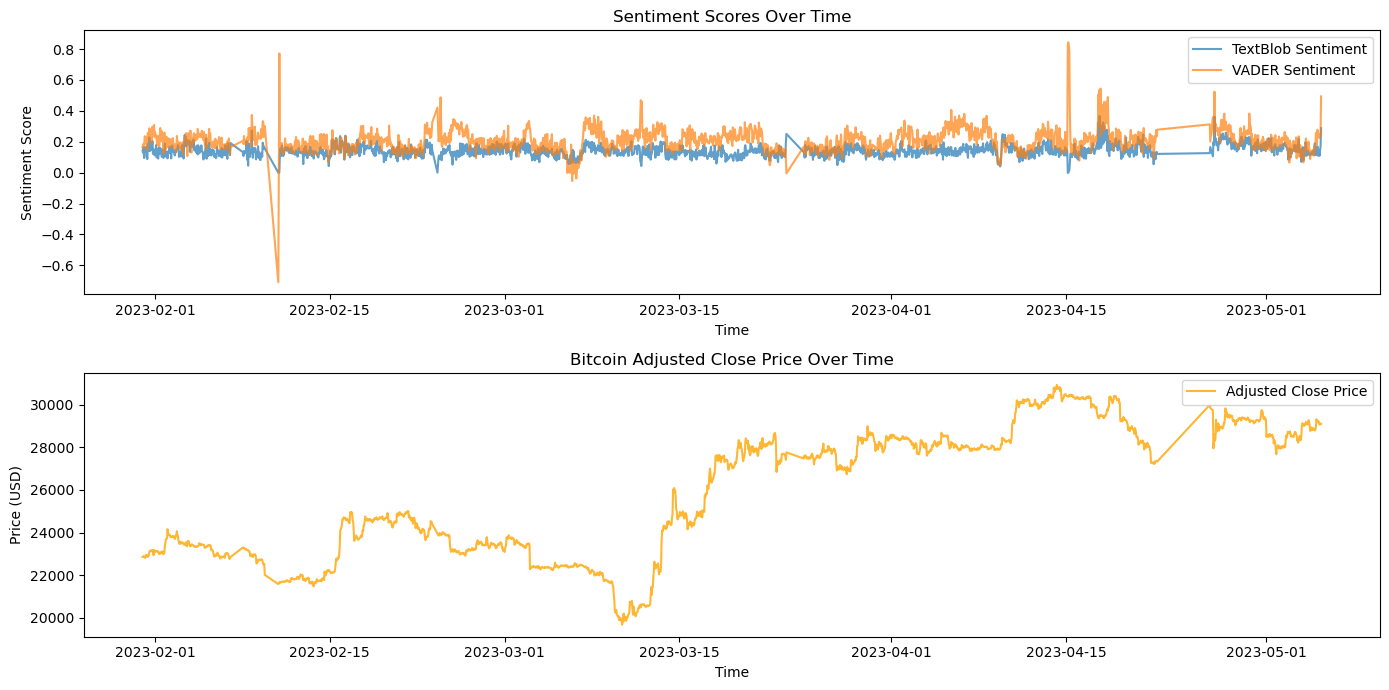

In [24]:
import matplotlib.pyplot as plt

# Plot sentiment scores and Adjusted Close prices over time
plt.figure(figsize=(14, 7))

# Sentiment Scores
plt.subplot(2, 1, 1)
plt.plot(merged_data['rounded_time'], merged_data['sentiment_score_textblob'], label='TextBlob Sentiment', alpha=0.7)
plt.plot(merged_data['rounded_time'], merged_data['sentiment_score_vader'], label='VADER Sentiment', alpha=0.7)
plt.title('Sentiment Scores Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.legend()

# Bitcoin Prices
plt.subplot(2, 1, 2)
plt.plot(merged_data['rounded_time'], merged_data['Adj Close'], label='Adjusted Close Price', color='orange', alpha=0.8)
plt.title('Bitcoin Adjusted Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
#Create a list of columns to keep in the completed data set and show the data.

keep_columns = ['Open','High','Low','Close','sentiment_score_textblob','sentiment_score_vader','target']
df = merged_data[keep_columns]
df.head()

,Open,High,Low,Close,sentiment_score_textblob,sentiment_score_vader,target
0,22840.79688,22864.25195,22765.56836,22857.76563,0.142336,0.165558,1
1,22855.97852,22870.33789,22797.08398,22858.32813,0.129171,0.178608,1
2,22855.14844,22909.50195,22847.17969,22893.31836,0.164494,0.186917,1
3,22890.26367,22890.26367,22858.86914,22861.80469,0.094387,0.158187,0
4,22859.74414,22874.23047,22831.37891,22862.11719,0.106855,0.235430,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


features = ['sentiment_score_textblob', 'sentiment_score_vader', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
X = merged_data[features]
y = merged_data['target']

#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
#split train and validation data
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [49]:
# Random Forest Classifier
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_classifier = baseline_model.predict(x_val)

# Metrics
accuracy = accuracy_score(y_val, y_pred_classifier)
report = classification_report(y_val, y_pred_classifier)


# Displaying the metrics in a readable format
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)


Accuracy: 0.67

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       160
           1       0.69      0.69      0.69       172

    accuracy                           0.67       332
   macro avg       0.67      0.67      0.67       332
weighted avg       0.67      0.67      0.67       332



In [50]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score


Fitting 3 folds for each of 50 candidates, totalling 150 fits


({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'log2',
  'max_depth': None,
  'bootstrap': True},
 0.6981117233218074)

In [51]:
# Initial parameters
max_iterations = 20  # Number of iterations
iterations = 0
best_params = {
    'n_estimators': 200,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'log2',
    'max_depth': None,
    'bootstrap': True
}

while iterations < max_iterations:
    # Train the random forest with the current hyperparameters
    model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)
    model.fit(X_train, y_train)

    # Validate the model
    Y_pred_after_tunning = model.predict(x_val)
    accuracy = accuracy_score(y_val, Y_pred_after_tunning)

    # Check if the current parameters yield better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    else:
        # Randomly modify the hyperparameters
        n_estimators += np.random.choice([-10, 10])  # Add or subtract 10 trees

    iterations += 1
    print(f"Iteration {iterations}: n_estimators={n_estimators}, max_depth={max_depth}, Accuracy={best_accuracy:.4f}")

print(f"\nBest Parameters: n_estimators={n_estimators}, max_depth={max_depth}, Best Accuracy={best_accuracy:.4f}")

Iteration 1: n_estimators=220, max_depth=None, Accuracy=0.6837
Iteration 2: n_estimators=230, max_depth=None, Accuracy=0.6837
Iteration 3: n_estimators=220, max_depth=None, Accuracy=0.6837
Iteration 4: n_estimators=210, max_depth=None, Accuracy=0.6837
Iteration 5: n_estimators=220, max_depth=None, Accuracy=0.6837
Iteration 6: n_estimators=210, max_depth=None, Accuracy=0.6837
Iteration 7: n_estimators=200, max_depth=None, Accuracy=0.6837
Iteration 8: n_estimators=210, max_depth=None, Accuracy=0.6837
Iteration 9: n_estimators=200, max_depth=None, Accuracy=0.6837
Iteration 10: n_estimators=210, max_depth=None, Accuracy=0.6837
Iteration 11: n_estimators=220, max_depth=None, Accuracy=0.6837
Iteration 12: n_estimators=230, max_depth=None, Accuracy=0.6837
Iteration 13: n_estimators=240, max_depth=None, Accuracy=0.6837
Iteration 14: n_estimators=250, max_depth=None, Accuracy=0.6837
Iteration 15: n_estimators=240, max_depth=None, Accuracy=0.6837
Iteration 16: n_estimators=230, max_depth=None, A

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_reg = rf_regressor.predict(x_val)

# regression metrics
mae = mean_absolute_error(y_val, y_pred_reg)
mse = mean_squared_error(y_val, y_pred_reg)
r2 = r2_score(y_val, y_pred_reg)

mae, mse, r2

(0.4085090361445783, 0.19226332831325302, 0.22994065770348837)

In [53]:
from sklearn.svm import SVR

# Train SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

#  predictions
y_pred_svr = svr_model.predict(x_val)

# regression metrics
mae_svr = mean_absolute_error(y_val, y_pred_svr)
mse_svr = mean_squared_error(y_val, y_pred_svr)
r2_svr = r2_score(y_val, y_pred_svr)

mae_svr, mse_svr, r2_svr

(0.4806385817305773, 0.36176046053399996, -0.44893477477832877)

In [ ]:
#testing Evaluation

In [34]:
# Random Forest Classifier
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_classifier_test = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_classifier_test)
report = classification_report(y_test, y_pred_classifier_test)


# Displaying the metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)


Accuracy: 0.63

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       217
           1       0.65      0.47      0.55       198

    accuracy                           0.63       415
   macro avg       0.63      0.62      0.61       415
weighted avg       0.63      0.63      0.62       415



In [45]:
from imblearn.over_sampling import SMOTE

# SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_resampled, y_resampled)

y_pred_classifier_test = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_classifier_test)
report = classification_report(y_test, y_pred_classifier_test)

# results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)


Accuracy: 0.63

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.82      0.70       217
           1       0.68      0.41      0.51       198

    accuracy                           0.63       415
   macro avg       0.64      0.62      0.60       415
weighted avg       0.64      0.63      0.61       415



In [35]:
# Initial parameters
n_estimators = 200  # Starting value
max_depth = None
best_accuracy = 0
max_iterations = 20  # Number of iterations
iterations = 0

while iterations < max_iterations:
    # Train the random forest with the current hyperparameters
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=420)
    model.fit(X_train, y_train)

    # Validate the model
    Y_pred_after_tunning_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred_after_tunning_test)

    # Check if the current parameters yield better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    else:
        # Randomly modify the hyperparameters
        n_estimators += np.random.choice([-10, 10])  # Add or subtract 10 trees

    iterations += 1
    print(f"Iteration {iterations}: n_estimators={n_estimators}, max_depth={max_depth}, Accuracy={best_accuracy:.4f}")

print(f"\nBest Parameters: n_estimators={n_estimators}, max_depth={max_depth}, Best Accuracy={best_accuracy:.4f}")

Iteration 1: n_estimators=200, max_depth=None, Accuracy=0.6386
Iteration 2: n_estimators=210, max_depth=None, Accuracy=0.6386
Iteration 3: n_estimators=220, max_depth=None, Accuracy=0.6386
Iteration 4: n_estimators=210, max_depth=None, Accuracy=0.6386
Iteration 5: n_estimators=220, max_depth=None, Accuracy=0.6386
Iteration 6: n_estimators=210, max_depth=None, Accuracy=0.6386
Iteration 7: n_estimators=200, max_depth=None, Accuracy=0.6386
Iteration 8: n_estimators=210, max_depth=None, Accuracy=0.6386
Iteration 9: n_estimators=200, max_depth=None, Accuracy=0.6386
Iteration 10: n_estimators=210, max_depth=None, Accuracy=0.6386
Iteration 11: n_estimators=220, max_depth=None, Accuracy=0.6386
Iteration 12: n_estimators=230, max_depth=None, Accuracy=0.6386
Iteration 13: n_estimators=240, max_depth=None, Accuracy=0.6386
Iteration 14: n_estimators=250, max_depth=None, Accuracy=0.6386
Iteration 15: n_estimators=240, max_depth=None, Accuracy=0.6386
Iteration 16: n_estimators=230, max_depth=None, A

In [36]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor.fit(X_train, y_train)

# =predictions
y_pred_reg_test = rf_regressor.predict(X_test)

# regression metrics
mae = mean_absolute_error(y_test, y_pred_reg_test)
mse = mean_squared_error(y_test, y_pred_reg_test)
r2 = r2_score(y_test, y_pred_reg_test)

mae, mse, r2

(0.43912048192771086, 0.2218205421686747, 0.11085409684401626)

In [37]:
from sklearn.svm import SVR

# Train SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# predictions
y_pred_svr_test = svr_model.predict(X_test)

# regression metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr_test)
mse_svr = mean_squared_error(y_test, y_pred_svr_test)
r2_svr = r2_score(y_test, y_pred_svr_test)

mae_svr, mse_svr, r2_svr

(0.45219021451000807, 0.32944286811191337, -0.32053944887991137)

In [416]:
#Model with LAG Feature with VADER 

In [84]:
btc_data = pd.read_csv('btc_hourly_data1.csv')
tweets_data = pd.read_csv('tweets_with_vader_sentiment.csv')
btc_data.head(), tweets_data.head()

(           Datetime    Adj Close        Close         High          Low  \
 0  01/31/2023-00:00  22857.76563  22857.76563  22864.25195  22765.56836   
 1  01/31/2023-01:00  22858.32813  22858.32813  22870.33789  22797.08398   
 2  01/31/2023-02:00  22893.31836  22893.31836  22909.50195  22847.17969   
 3  01/31/2023-03:00  22861.80469  22861.80469  22890.26367  22858.86914   
 4  01/31/2023-04:00  22862.11719  22862.11719  22874.23047  22831.37891   
 
           Open  Volume  
 0  22840.79688       0  
 1  22855.97852       0  
 2  22855.14844       0  
 3  22890.26367       0  
 4  22859.74414       0  ,
             created_at      rounded_time  \
 0  01/31/2023-00:26:52  01/31/2023-00:00   
 1  01/31/2023-00:30:53  01/31/2023-01:00   
 2  01/31/2023-00:31:53  01/31/2023-01:00   
 3  01/31/2023-00:32:23  01/31/2023-01:00   
 4  01/31/2023-00:35:54  01/31/2023-01:00   
 
                                                 text  \
 0  chroniclove69 onlyfans leaks (13 photos)\n\nTi...   

In [85]:
# Convert Datetime columns to a uniform datetime format for merging
btc_data['Datetime'] = pd.to_datetime(btc_data['Datetime'], format='%m/%d/%Y-%H:%M')
tweets_data['rounded_time'] = pd.to_datetime(tweets_data['rounded_time'], format='%m/%d/%Y-%H:%M')

# Aggregate sentiment scores by hour
tweets_agg = tweets_data.groupby('rounded_time').agg(
    avg_sentiment_score=('sentiment_score', 'mean'),
    sentiment_positive=('sentiment', lambda x: (x == 'Positive').sum()),
    sentiment_negative=('sentiment', lambda x: (x == 'Negative').sum()),
    total_tweets=('sentiment', 'count')
).reset_index()

# Merge the Bitcoin and sentiment datasets
btc_data_merged = btc_data.merge(tweets_agg, left_on='Datetime', right_on='rounded_time', how='left')

# Drop the redundant 'rounded_time' column
btc_data_merged = btc_data_merged.drop(columns=['rounded_time'])

btc_data_merged


,Datetime,Adj Close,Close,High,Low,Open,Volume,avg_sentiment_score,sentiment_positive,sentiment_negative,total_tweets
0,2023-01-31 00:00:00,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0,0.165558,7.0,0.0,12.0
1,2023-01-31 01:00:00,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0,0.178608,49.0,15.0,119.0
2,2023-01-31 02:00:00,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0,0.186917,54.0,16.0,120.0
3,2023-01-31 03:00:00,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0,0.158187,59.0,13.0,120.0
4,2023-01-31 04:00:00,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0,0.235430,64.0,11.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...
2221,2023-05-05 19:00:00,29548.35742,29548.35742,29563.33594,29405.56445,29423.19727,43716608,NaN,NaN,NaN,NaN
2222,2023-05-05 20:00:00,29545.22656,29545.22656,29592.90039,29490.28906,29573.83203,95922176,NaN,NaN,NaN,NaN
2223,2023-05-05 21:00:00,29529.33008,29529.33008,29573.42578,29491.31445,29543.92773,8183808,NaN,NaN,NaN,NaN
2224,2023-05-05 22:00:00,29636.26367,29636.26367,29665.10547,29516.07617,29520.10742,14575616,NaN,NaN,NaN,NaN


In [86]:
# Create lagged sentiment features
for lag in range(1, 4):  # Lagging by 1, 2, and 3 hours
    btc_data_merged[f'avg_sentiment_score_lag{lag}'] = btc_data_merged['avg_sentiment_score'].shift(lag)
    btc_data_merged[f'sentiment_positive_lag{lag}'] = btc_data_merged['sentiment_positive'].shift(lag)
    btc_data_merged[f'sentiment_negative_lag{lag}'] = btc_data_merged['sentiment_negative'].shift(lag)

# Correlation of lagged sentiment features with 'Adj Close'
lagged_columns = [col for col in btc_data_merged.columns if 'lag' in col]
correlation_with_price = btc_data_merged[['Adj Close'] + lagged_columns].corr()['Adj Close'].iloc[1:]




In [87]:
btc_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Datetime                  2226 non-null   datetime64[ns]
 1   Adj Close                 2226 non-null   float64       
 2   Close                     2226 non-null   float64       
 3   High                      2226 non-null   float64       
 4   Low                       2226 non-null   float64       
 5   Open                      2226 non-null   float64       
 6   Volume                    2226 non-null   int64         
 7   avg_sentiment_score       2072 non-null   float64       
 8   sentiment_positive        2072 non-null   float64       
 9   sentiment_negative        2072 non-null   float64       
 10  total_tweets              2072 non-null   float64       
 11  avg_sentiment_score_lag1  2072 non-null   float64       
 12  sentiment_positive_l

In [113]:
#target and features
target = 'Adj Close'
features = ['avg_sentiment_score', 'sentiment_positive', 'sentiment_negative', 'total_tweets'] + lagged_columns
data = btc_data_merged.dropna(subset=features + [target])
#features and target variables
X = data[features]
y = data[target]
#split 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
#Split traning set to 80% train and 20% validation
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [114]:
#Model Validation and training

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model_val = RandomForestRegressor(n_estimators=100, random_state=42)
model_val.fit(X_train, y_train)
y_pred_val = model_val.predict(x_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

mae_val, rmse_val

(2146.420749650305, 2506.717535178123)

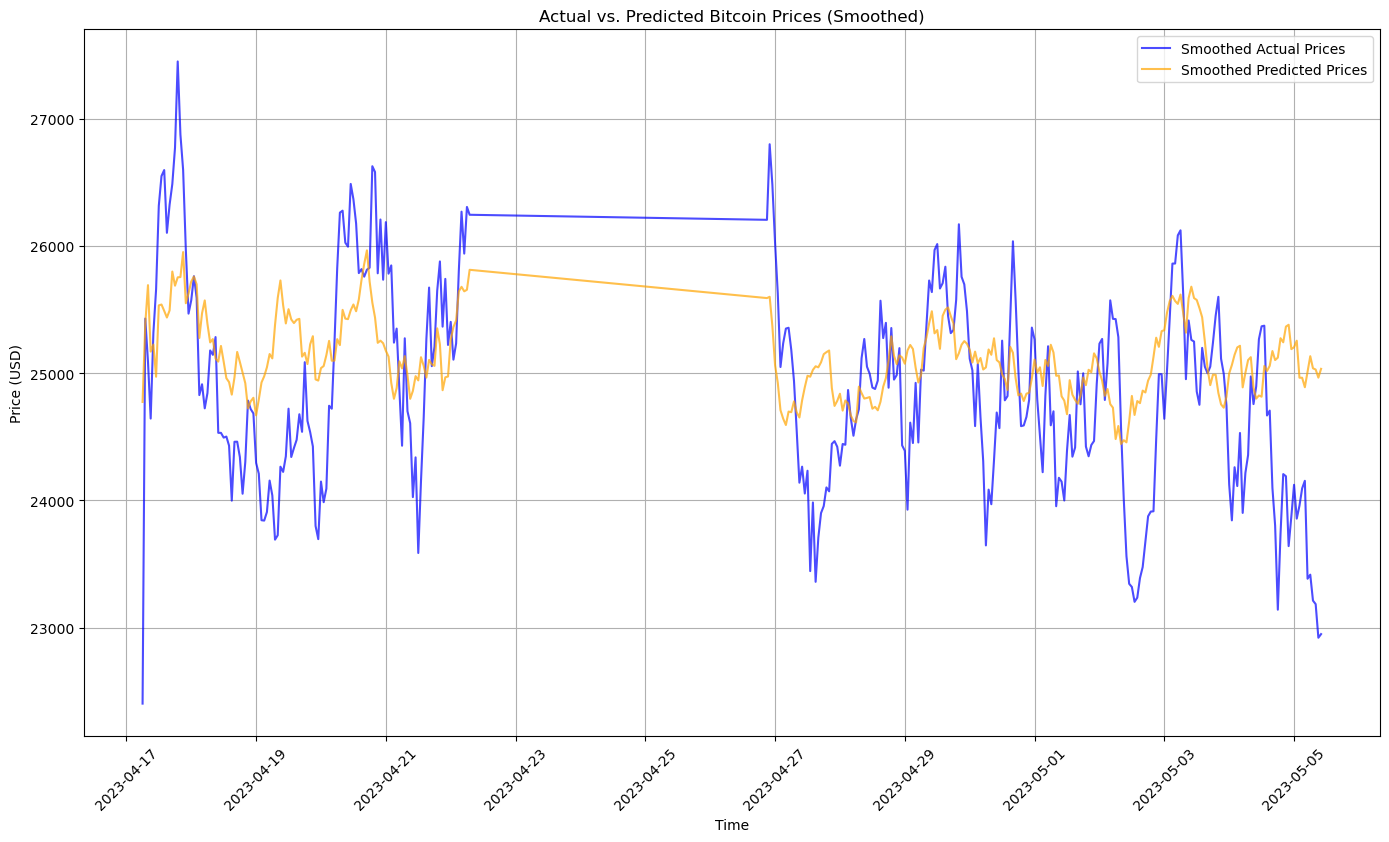

In [116]:
# Ensure the rolling mean is computed only for the relevant data range
smoothed_actual_val = pd.Series(y_val).rolling(window=10, min_periods=1).mean()
smoothed_predicted_val = pd.Series(y_pred_val).rolling(window=10, min_periods=1).mean()

# Plot the smoothed actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.plot(data['Datetime'][-len(y_val):], smoothed_actual_val, label='Smoothed Actual Prices', alpha=0.7, color='blue')
plt.plot(data['Datetime'][-len(y_val):], smoothed_predicted_val, label='Smoothed Predicted Prices', alpha=0.7, color='orange')
plt.title('Actual vs. Predicted Bitcoin Prices (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [92]:
#With hyper parameter tunning

In [425]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negative MSE is returned; convert to positive

best_params, best_score


Fitting 3 folds for each of 243 candidates, totalling 729 fits


({'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 50},
 6849462.4690874005)

In [117]:
# Fit the model with the best parameters
optimized_model = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=50,
    random_state=42
)

# Train the model
optimized_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_optimized = optimized_model.predict(x_val)

# Evaluate the model
mae_optimized = mean_absolute_error(y_val, y_pred_optimized)
rmse_optimized = np.sqrt(mean_squared_error(y_val, y_pred_optimized))

mae_optimized, rmse_optimized


(2171.8199710489903, 2491.6229069951382)

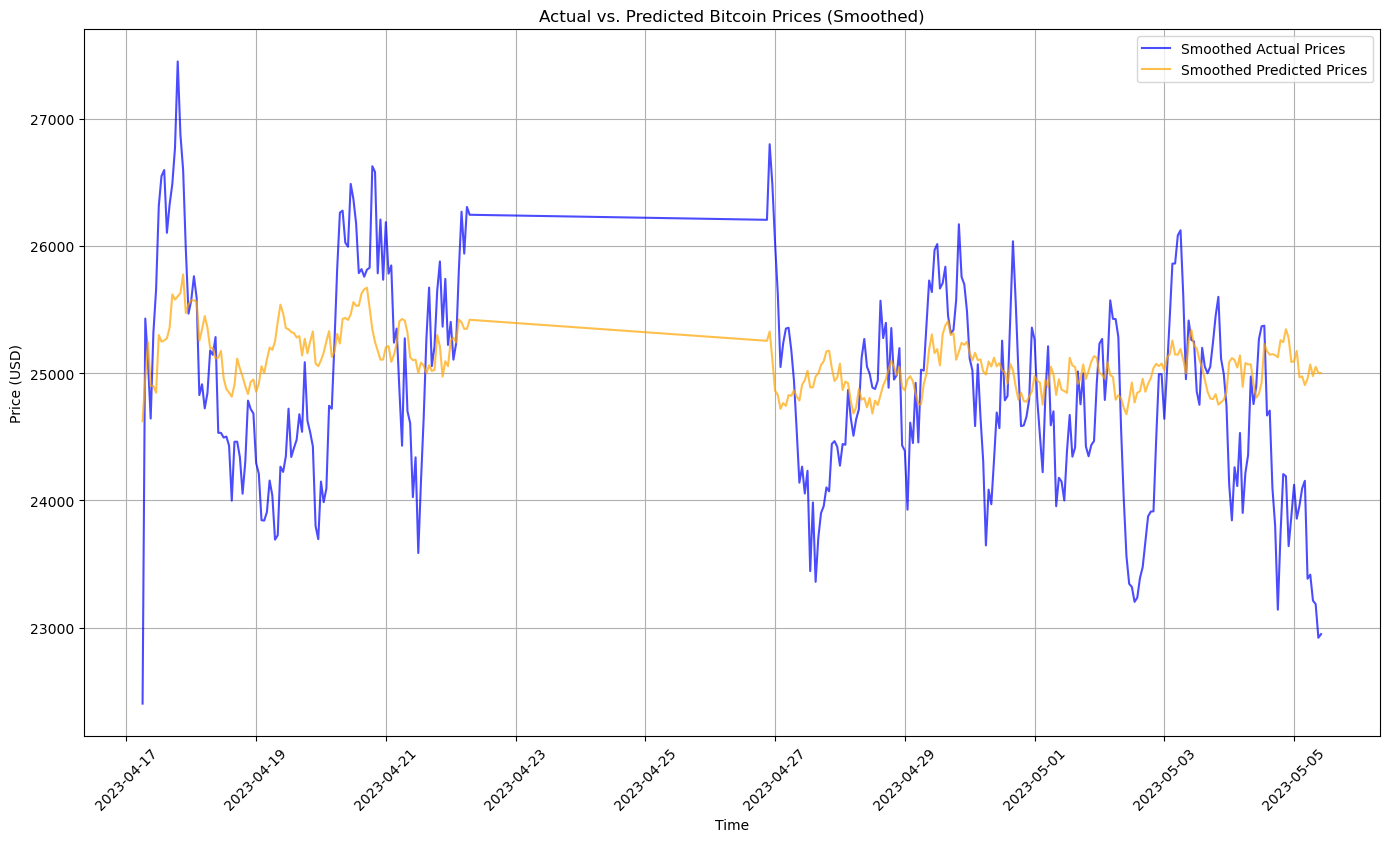

In [118]:
# Ensure the rolling mean is computed only for the relevant data range
smoothed_actual = pd.Series(y_val).rolling(window=10, min_periods=1).mean()
smoothed_predicted = pd.Series(y_pred_optimized).rolling(window=10, min_periods=1).mean()

# Plot the smoothed actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.plot(data['Datetime'][-len(y_val):], smoothed_actual, label='Smoothed Actual Prices', alpha=0.7, color='blue')
plt.plot(data['Datetime'][-len(y_val):], smoothed_predicted, label='Smoothed Predicted Prices', alpha=0.7, color='orange')
plt.title('Actual vs. Predicted Bitcoin Prices (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [119]:
#Model testing

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model_test_NTI = RandomForestRegressor(n_estimators=100, random_state=42)
model_test_NTI.fit(X_train, y_train)
y_pred_test_NTI = model_test_NTI.predict(X_test)
mae_test_NTI = mean_absolute_error(y_test, y_pred_test_NTI)
rmse_test_NTI = np.sqrt(mean_squared_error(y_test, y_pred_test_NTI))
r2_test_NTI = r2_score(y_test, y_pred_test_NTI)

mae_test_NTI, rmse_test_NTI, r2_test_NTI

(4460.650319527806, 4602.553688426336, -29.057003320538108)

In [97]:
# Fit the model with the best parameters
optimized_model_test = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=50,
    random_state=42
)

# Train the model
optimized_model_test.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized_test = optimized_model_test.predict(X_test)

# Evaluate the model
mae_optimized_test = mean_absolute_error(y_test, y_pred_optimized_test)
rmse_optimized_test = np.sqrt(mean_squared_error(y_test, y_pred_optimized_test))
r2_optimized_test = r2_score(y_test, y_pred_optimized_test)

mae_optimized_test, rmse_optimized_test, r2_optimized_test


(2722.8217574643677, 3002.9182849954195, 0.015021840237507633)

In [98]:
#After adding technical indicators Simple moving average / RSI

In [121]:
import ta

In [122]:
# Add technical indicators to the dataset
btc_data_merged['SMA_10'] = btc_data_merged['Adj Close'].rolling(window=10).mean() #10 hours
btc_data_merged['SMA_30'] = btc_data_merged['Adj Close'].rolling(window=30).mean()  # 30-hour
btc_data_merged['Volatility'] = btc_data_merged['Adj Close'].rolling(window=10).std()  # Rolling standard deviation (10-hour)
btc_data_merged['RSI'] = ta.momentum.RSIIndicator(btc_data_merged['Adj Close'], window=14).rsi()  # Relative Strength Index

In [123]:
btc_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Datetime                  2226 non-null   datetime64[ns]
 1   Adj Close                 2226 non-null   float64       
 2   Close                     2226 non-null   float64       
 3   High                      2226 non-null   float64       
 4   Low                       2226 non-null   float64       
 5   Open                      2226 non-null   float64       
 6   Volume                    2226 non-null   int64         
 7   avg_sentiment_score       2072 non-null   float64       
 8   sentiment_positive        2072 non-null   float64       
 9   sentiment_negative        2072 non-null   float64       
 10  total_tweets              2072 non-null   float64       
 11  avg_sentiment_score_lag1  2072 non-null   float64       
 12  sentiment_positive_l

In [102]:
btc_data_merged.to_csv('BTC merged data.csv', index=False)

In [124]:
btc_data_with_indicators = btc_data_merged.dropna(subset=features + ['SMA_10', 'SMA_30', 'Volatility', 'RSI'] + [target])

In [125]:
features_with_indicators = features + ['SMA_10', 'SMA_30', 'Volatility', 'RSI']

In [126]:
X1 = btc_data_with_indicators[features_with_indicators]
y1 = btc_data_with_indicators[target]
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle=False)
#split train and validation data
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [106]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negative MSE is returned; convert to positive

best_params, best_score


Fitting 3 folds for each of 243 candidates, totalling 729 fits


({'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 58413.84781866078)

In [127]:
# Fit the model with the best parameters
optimized_model_with_indicators = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the model
optimized_model_with_indicators.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized_indicators = optimized_model_with_indicators.predict(x_val)

# Evaluate the model
mae_optimized_indicators = mean_absolute_error(y_val, y_pred_optimized_indicators)
rmse_optimized_indicators = np.sqrt(mean_squared_error(y_val, y_pred_optimized_indicators))
r2__optimized_indicators = r2_score(y_val, y_pred_optimized_indicators)

mae_optimized_indicators, rmse_optimized_indicators, r2__optimized_indicators


(122.77364256696545, 182.99821721749584, 0.9951746512931599)

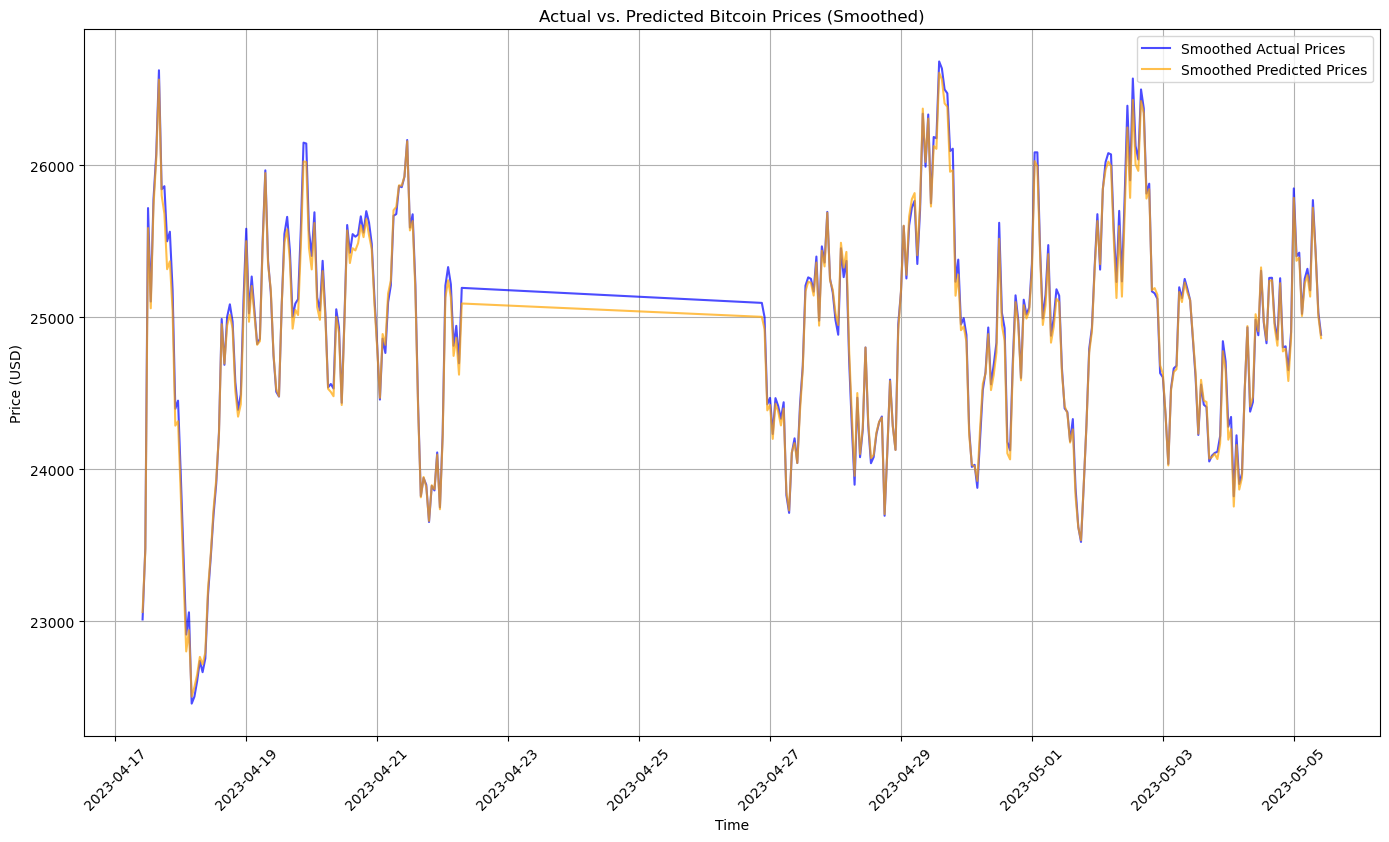

In [128]:
# Ensure the rolling mean is computed only for the relevant data range
smoothed_actual = pd.Series(y_val).rolling(window=10, min_periods=1).mean()
smoothed_predicted = pd.Series(y_pred_optimized_indicators).rolling(window=10, min_periods=1).mean()

# Plot the smoothed actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.plot(data['Datetime'][-len(y_val):], smoothed_actual, label='Smoothed Actual Prices', alpha=0.7, color='blue')
plt.plot(data['Datetime'][-len(y_val):], smoothed_predicted, label='Smoothed Predicted Prices', alpha=0.7, color='orange')
plt.title('Actual vs. Predicted Bitcoin Prices (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [129]:
#testing with indicators

In [130]:
model_test_with_indicators = RandomForestRegressor(n_estimators=100, random_state=42)
model_test_with_indicators.fit(X_train, y_train)
y_pred_test_with_indicators = model_test_with_indicators.predict(X_test)
mae_test_with_indicators = mean_absolute_error(y_test, y_pred_test_with_indicators)
rmse_test_with_indicators = np.sqrt(mean_squared_error(y_test, y_pred_test_with_indicators))
r2_test_with_indicators = r2_score(y_test, y_pred_test_with_indicators)

mae_test_with_indicators, rmse_test_with_indicators, r2_test_with_indicators

(404.1986156345615, 523.3978198823628, 0.6062077701344571)

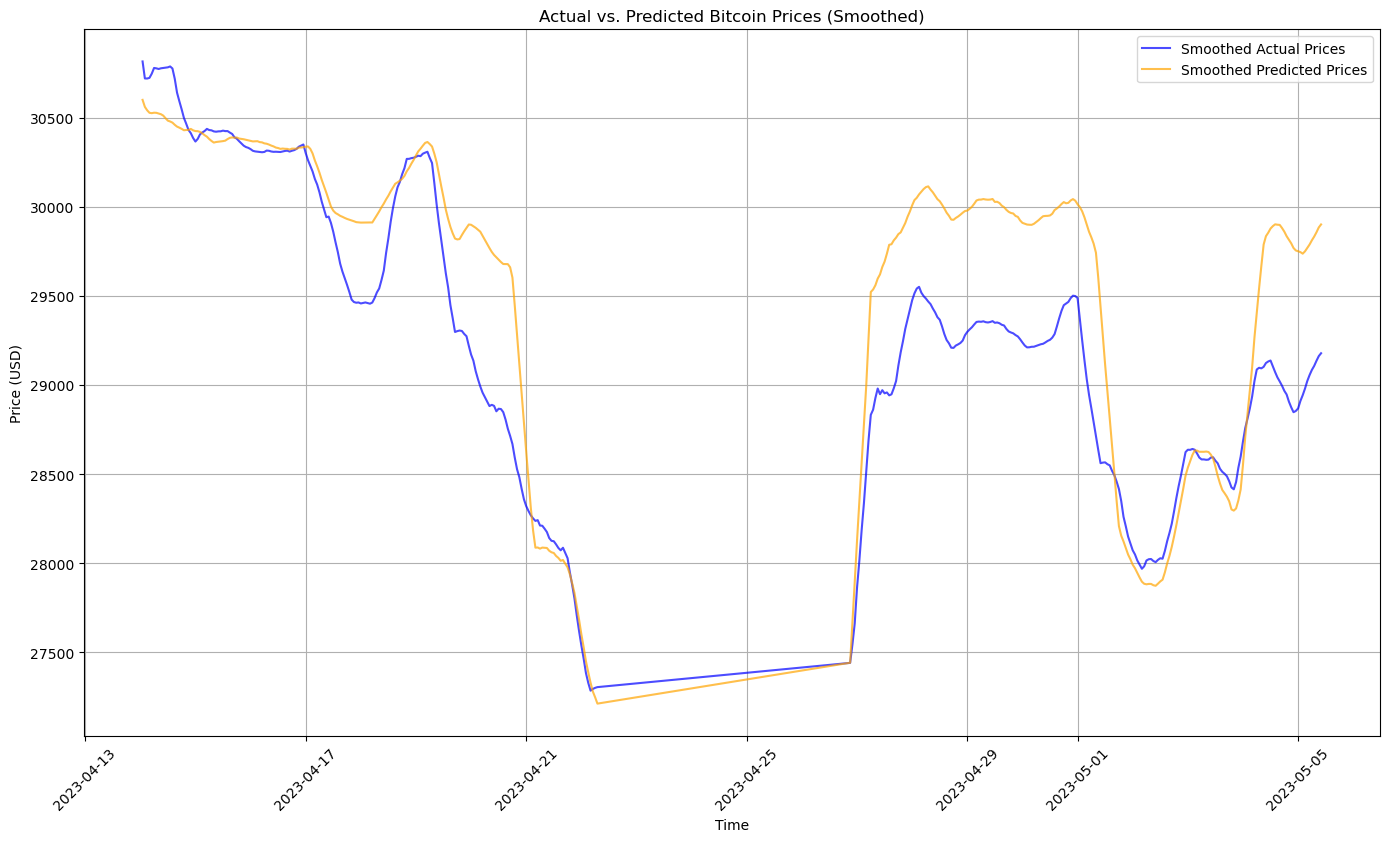

In [131]:
# Ensure the rolling mean is computed only for the relevant data range
smoothed_actual = pd.Series(y_test).rolling(window=10, min_periods=1).mean()
smoothed_predicted = pd.Series(y_pred_test_with_indicators).rolling(window=10, min_periods=1).mean()

# Plot the smoothed actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.plot(data['Datetime'][-len(y_test):], smoothed_actual, label='Smoothed Actual Prices', alpha=0.7, color='blue')
plt.plot(data['Datetime'][-len(y_test):], smoothed_predicted, label='Smoothed Predicted Prices', alpha=0.7, color='orange')
plt.title('Actual vs. Predicted Bitcoin Prices (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [132]:
# Fit the model with the best parameters
optimized_model_with_indicators_opt = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the model
optimized_model_with_indicators_opt.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized_indicators_opt = optimized_model_with_indicators_opt.predict(X_test)

# Evaluate the model
mae_optimized_indicators_opt = mean_absolute_error(y_test, y_pred_optimized_indicators_opt)
rmse_optimized_indicators_opt = np.sqrt(mean_squared_error(y_test, y_pred_optimized_indicators_opt))
r2__optimized_indicators_opt = r2_score(y_test, y_pred_optimized_indicators_opt)

mae_optimized_indicators_opt, rmse_optimized_indicators_opt, r2__optimized_indicators_opt


(379.12356502341294, 493.624505415528, 0.6497349965892893)

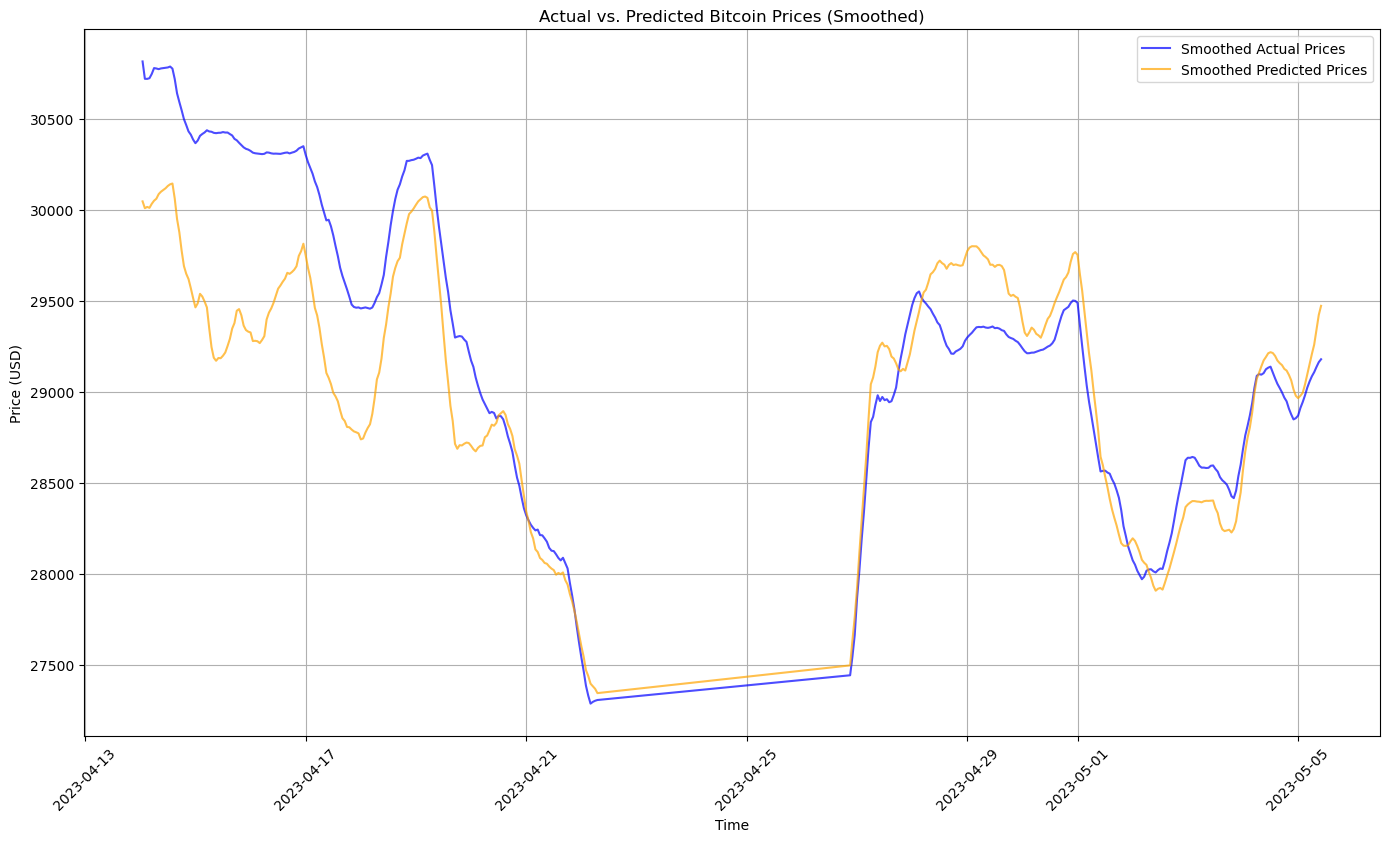

In [133]:
# Ensure the rolling mean is computed only for the relevant data range
smoothed_actual = pd.Series(y_test).rolling(window=10, min_periods=1).mean()
smoothed_predicted = pd.Series(y_pred_optimized_indicators_opt).rolling(window=10, min_periods=1).mean()

# Plot the smoothed actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.plot(data['Datetime'][-len(y_test):], smoothed_actual, label='Smoothed Actual Prices', alpha=0.7, color='blue')
plt.plot(data['Datetime'][-len(y_test):], smoothed_predicted, label='Smoothed Predicted Prices', alpha=0.7, color='orange')
plt.title('Actual vs. Predicted Bitcoin Prices (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


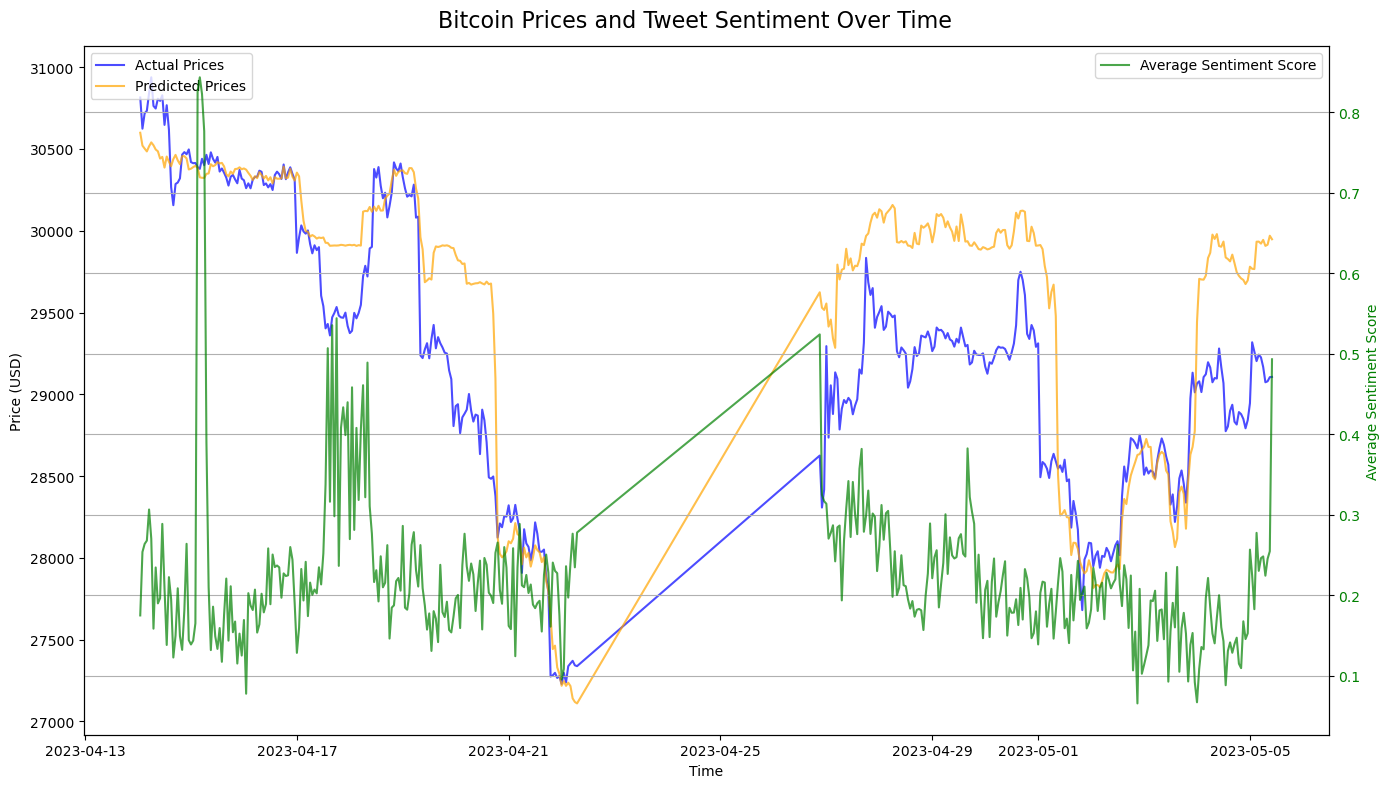

In [448]:
# sentiment data to match the same date range as the test set
sentiment_data = btc_data_with_indicators[['Datetime', 'avg_sentiment_score']].iloc[-len(y_test):]

# Plot actual prices, predicted prices, and average sentiment score
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot actual and predicted prices
ax1.plot(btc_data_with_indicators['Datetime'][-len(y_test):], y_test, label='Actual Prices', alpha=0.7, color='blue')
ax1.plot(btc_data_with_indicators['Datetime'][-len(y_test):], y_pred_test_with_indicators, label='Predicted Prices', alpha=0.7, color='orange')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (USD)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

#  y-axis for sentiment scores
ax2 = ax1.twinx()
ax2.plot(sentiment_data['Datetime'], sentiment_data['avg_sentiment_score'], label='Average Sentiment Score', alpha=0.7, color='green')
ax2.set_ylabel('Average Sentiment Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle('Bitcoin Prices and Tweet Sentiment Over Time', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
